<a href="https://colab.research.google.com/github/NethmiAyeshika625/LaravelProject_225011V/blob/main/FlightDelayGradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn xgboost matplotlib seaborn kaggle gradio

In [ ]:
# STEP 1: Upload kaggle.json (from your computer)
from google.colab import files
files.upload()  # Choose kaggle.json when prompted

# STEP 2: Move kaggle.json to ~/.kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# STEP 3: Install Kaggle CLI if not already
!pip install -q kaggle

# STEP 4: Download and unzip the dataset
!kaggle datasets download -d usdot/flight-delays
!unzip -o flight-delays.zip


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/usdot/flight-delays
License(s): CC0-1.0
 58% 111M/191M [00:00<00:00, 1.16GB/s]
100% 191M/191M [00:00<00:00, 734MB/s] 
Archive:  flight-delays.zip
  inflating: airlines.csv            
  inflating: airports.csv            
  inflating: flights.csv             


In [ ]:
import pandas as pd
import numpy as np

# Load data (sample 50,000 rows to keep it fast)
df = pd.read_csv('flights.csv').sample(50000, random_state=42)

# Select useful columns and rename them
df = df[['AIRLINE', 'SCHEDULED_DEPARTURE', 'DISTANCE', 'ARRIVAL_DELAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']]
df = df.rename(columns={
    'SCHEDULED_DEPARTURE': 'departure_hour',
    'DISTANCE': 'travel_distance_km'
})

# Create the target: 1 = delay >30 minutes, 0 = no
df['delay_target'] = (df['ARRIVAL_DELAY'] > 30).astype(int)
df = df.drop('ARRIVAL_DELAY', axis=1)  # Remove original delay column

# Add simulated features (since dataset doesn't have them)
df['purchase_lead_time'] = np.random.randint(1, 365, len(df))  # Days before flight
df['fare_type'] = np.random.choice(['Basic', 'Flexible', 'Refundable'], len(df))  # Ticket type
df['loyalty_membership'] = np.random.choice(['None', 'Silver', 'Gold'], len(df))  # Loyalty level
df['seat_assignment'] = np.random.choice([0, 1], len(df), p=[0.2, 0.8])  # 1 = assigned

# Convert departure time to hour (e.g., 835 = 8 AM)
df['departure_hour'] = df['departure_hour'] // 100

# Show delay rate and first 5 rows
print(f"Delay rate: {df['delay_target'].mean():.2%}")
df.head()

/tmp/ipython-input-462878761.py:5: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flights.csv').sample(50000, random_state=42)


Delay rate: 11.00%


,AIRLINE,departure_hour,travel_distance_km,ORIGIN_AIRPORT,DESTINATION_AIRPORT,delay_target,purchase_lead_time,fare_type,loyalty_membership,seat_assignment
1508570,EV,13,128,FWA,DTW,0,220,Flexible,None,1
363270,AS,19,867,LAS,SEA,0,353,Refundable,Gold,1
3003945,WN,6,672,OAK,SEA,0,192,Basic,Gold,1
2291425,WN,8,546,STL,DAL,1,30,Basic,None,1
2973084,UA,10,3904,IAH,HNL,0,355,Basic,Gold,1


In [ ]:
import pandas as pd
import numpy as np

# Load data (sample 50,000 rows to keep it fast)
df = pd.read_csv('flights.csv').sample(50000, random_state=42)

# Select useful columns and rename them
df = df[['AIRLINE', 'SCHEDULED_DEPARTURE', 'DISTANCE', 'ARRIVAL_DELAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']]
df = df.rename(columns={
    'SCHEDULED_DEPARTURE': 'departure_hour',
    'DISTANCE': 'travel_distance_km'
})

# Create the target: 1 = delay >30 minutes, 0 = no
df['delay_target'] = (df['ARRIVAL_DELAY'] > 30).astype(int)
df = df.drop('ARRIVAL_DELAY', axis=1)  # Remove original delay column

# Add simulated features (since dataset doesn't have them)
df['purchase_lead_time'] = np.random.randint(1, 365, len(df))  # Days before flight
df['fare_type'] = np.random.choice(['Basic', 'Flexible', 'Refundable'], len(df))  # Ticket type
df['loyalty_membership'] = np.random.choice(['None', 'Silver', 'Gold'], len(df))  # Loyalty level
df['seat_assignment'] = np.random.choice([0, 1], len(df), p=[0.2, 0.8])  # 1 = assigned

# Convert departure time to hour (e.g., 835 = 8 AM)
df['departure_hour'] = df['departure_hour'] // 100

# Show delay rate and first 5 rows
print(f"Delay rate: {df['delay_target'].mean():.2%}")
df.head()

/tmp/ipython-input-462878761.py:5: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flights.csv').sample(50000, random_state=42)


Delay rate: 11.00%


,AIRLINE,departure_hour,travel_distance_km,ORIGIN_AIRPORT,DESTINATION_AIRPORT,delay_target,purchase_lead_time,fare_type,loyalty_membership,seat_assignment
1508570,EV,13,128,FWA,DTW,0,106,Basic,Silver,1
363270,AS,19,867,LAS,SEA,0,86,Basic,Silver,1
3003945,WN,6,672,OAK,SEA,0,119,Refundable,Gold,1
2291425,WN,8,546,STL,DAL,1,311,Refundable,Silver,0
2973084,UA,10,3904,IAH,HNL,0,106,Refundable,Silver,1


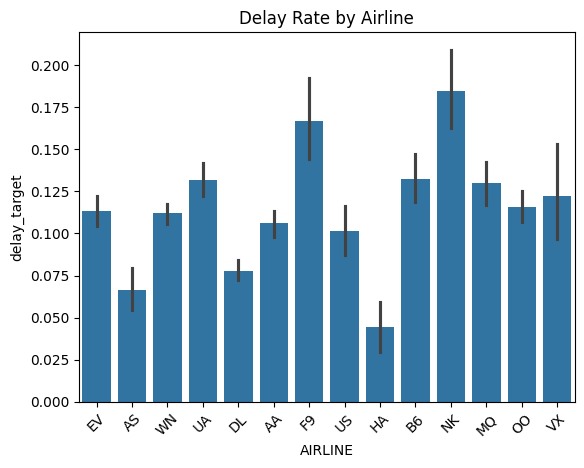

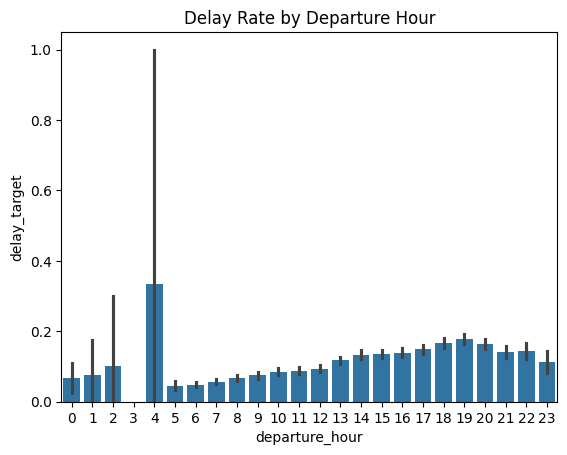

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chart: Delay rate by airline
sns.barplot(x='AIRLINE', y='delay_target', data=df)
plt.title('Delay Rate by Airline')
plt.xticks(rotation=45)
plt.show()

# Chart: Delay rate by departure hour
sns.barplot(x='departure_hour', y='delay_target', data=df)
plt.title('Delay Rate by Departure Hour')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import joblib

# Split data
X = df.drop('delay_target', axis=1)
y = df['delay_target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define columns
numeric_cols = ['purchase_lead_time', 'departure_hour', 'travel_distance_km']
cat_cols = ['AIRLINE', 'fare_type', 'loyalty_membership', 'seat_assignment', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']

# Convert categorical columns to string type to handle mixed types
for col in cat_cols:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)


# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())]), numeric_cols),
    ('cat', Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('encoder', OneHotEncoder(handle_unknown='ignore'))]), cat_cols)
])

# Train model
pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)
pipe = Pipeline([('prep', preprocessor), ('model', XGBClassifier(scale_pos_weight=pos_weight, eval_metric='logloss', random_state=42))])
pipe.fit(X_train, y_train)

# Test model
y_pred = pipe.predict(X_test)
print("Model Results:\n", classification_report(y_test, y_pred))

# Save model
joblib.dump(pipe, 'delay_model.joblib')

Model Results:
               precision    recall  f1-score   support

           0       0.92      0.62      0.74      8911
           1       0.16      0.57      0.24      1089

    accuracy                           0.62     10000
   macro avg       0.54      0.60      0.49     10000
weighted avg       0.84      0.62      0.69     10000



['delay_model.joblib']

In [ ]:
import gradio as gr
import matplotlib.pyplot as plt
from PIL import Image
import io
import pandas as pd
import joblib
import numpy as np

# Load the model
model = joblib.load("delay_model.joblib")

def predict_delay(airline, purchase_lead_time, departure_hour, travel_distance_km,
                  fare_type, loyalty_membership, seat_assignment, origin_airport, destination_airport):

    # Prepare input for model
    input_df = pd.DataFrame([{
        'AIRLINE': airline,
        'purchase_lead_time': purchase_lead_time,
        'departure_hour': departure_hour,
        'travel_distance_km': travel_distance_km,
        'fare_type': fare_type,
        'loyalty_membership': loyalty_membership,
        'seat_assignment': 1 if seat_assignment else 0,
        'ORIGIN_AIRPORT': origin_airport,
        'DESTINATION_AIRPORT': destination_airport
    }])

    prob = model.predict_proba(input_df)[:,1][0]

    # Determine risk level
    if prob > 0.5:
        tips = "⚠️ High delay risk: Book a flexible ticket or choose an earlier flight."
        bar_color = "#ff4d4d"  # red
    elif prob > 0.2:
        tips = "🟡 Medium delay risk: Arrive early and monitor the flight status."
        bar_color = "#ffa500"  # orange
    else:
        tips = "✅ Low delay risk: You're good to go, but check for updates."
        bar_color = "#4CAF50"  # green

    # Gradient bar with rounded corners
    fig, ax = plt.subplots(figsize=(6, 0.6))
    ax.barh([0], [prob], color=bar_color, height=0.5, edgecolor='black', linewidth=0.8)
    ax.set_xlim(0, 1)
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_xticklabels(['0%', '25%', '50%', '75%', '100%'])
    ax.set_yticks([])
    ax.bar_label(ax.containers[0], labels=[f"{prob*100:.0f}%"], label_type='center', color='white', fontsize=12)
    plt.tight_layout()

    buf = io.BytesIO()
    plt.savefig(buf, format='png', transparent=True)
    plt.close(fig)
    buf.seek(0)
    img = Image.open(buf)

    # Card-style tip with colored background
    tips_md = f"<div style='background-color:{bar_color}; padding:10px; border-radius:10px; color:white; font-weight:bold'>{tips}</div>"

    return f"{prob*100:.2f}% chance of delay", tips_md, img

# -------------------------------
# GRADIO UI
# -------------------------------
with gr.Blocks() as demo:
    gr.Markdown("<h2 style='text-align:center'>✈️ Flight Delay Predictor</h2>", elem_id="title")
    gr.Markdown("<p style='text-align:center'>Enter your flight details and get a professional delay prediction dashboard.</p>")

    with gr.Row():
        with gr.Column(scale=1):
            airline = gr.Dropdown(['AA','UA','DL','WN','AS'], label="Airline")
            purchase_lead_time = gr.Number(label="Days before flight", value=5)
            departure_hour = gr.Number(label="Departure hour (0-23)", value=15)
            travel_distance_km = gr.Number(label="Travel distance (km)", value=2000)
            fare_type = gr.Dropdown(['Basic','Flexible','Refundable'], label="Fare type")
            loyalty_membership = gr.Dropdown(['None','Silver','Gold'], label="Loyalty membership")
            seat_assignment = gr.Checkbox(label="Seat assigned")
            origin_airport = gr.Textbox(label="Origin airport", value="JFK")
            destination_airport = gr.Textbox(label="Destination airport", value="LAX")
            submit_btn = gr.Button("Predict Delay", variant="primary")

        with gr.Column(scale=1):
            output_prob = gr.Textbox(label="Delay Probability", interactive=False)
            output_tips = gr.Markdown(label="Tips")
            output_img = gr.Image(label="Probability Visual")

    submit_btn.click(
        fn=predict_delay,
        inputs=[airline, purchase_lead_time, departure_hour, travel_distance_km,
                fare_type, loyalty_membership, seat_assignment, origin_airport, destination_airport],
        outputs=[output_prob, output_tips, output_img]
    )

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://abe24dadbd5d772095.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
